In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import math
from IPython.display import display, Markdown

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocesssing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from scipy.stats import norm
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

# Evaludation
from sklearn.model_selection import cross_val_score, ShuffleSplit, learning_curve, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning, FitFailedWarning

with warnings.catch_warnings():
    warnings.simplefilter("ignore", ConvergenceWarning)
    warnings.simplefilter("ignore", FitFailedWarning)

# Load Data

In [3]:
df = pd.read_csv("creditcard.csv")
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Unique value count
frequency = df["Class"].value_counts()
total = len(df["Class"])
display(frequency)

# Unique value percentage
print("-" * 100)
print(f"Non-Fraud: {frequency[0]/total*100:.2f}%")
print(f"Fraud: {frequency[1]/total*100:.2f}%")

Class
0    284315
1       492
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------
Non-Fraud: 99.83%
Fraud: 0.17%


C:\Users\khais\AppData\Local\Temp\ipykernel_5872\1637940796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x = "Class", palette=["#0057B7", "#D30000"])


Text(0.5, 1.0, 'Class Distribution \n (0: Non-Fraud || 1: Fraud)')

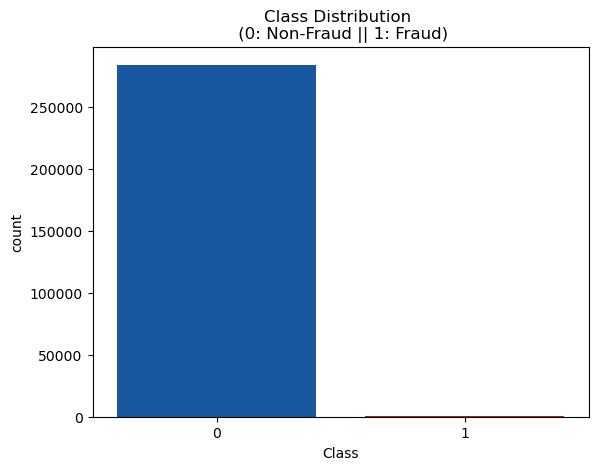

In [8]:
# Class Distribution
sns.countplot(df, x = "Class", palette=["#0057B7", "#D30000"])
plt.title("Class Distribution \n (0: Non-Fraud || 1: Fraud)")

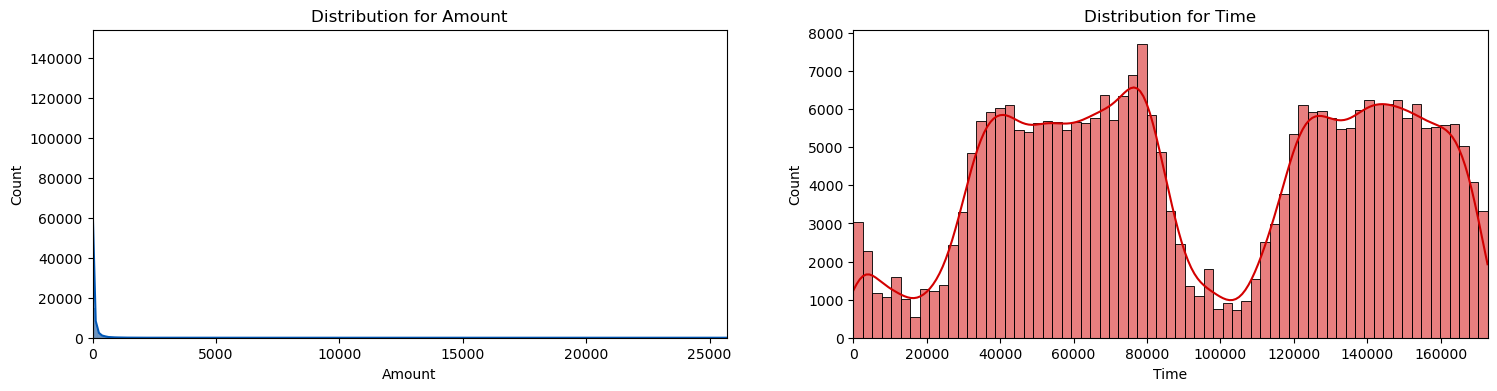

In [9]:
# Amount and Time Distribution
fig, ax = plt.subplots(1, 2, figsize = (18, 4))

sns.histplot(df["Amount"], ax = ax[0], color="#0057B7", kde = True)
ax[0].set_title("Distribution for Amount")
ax[0].set_xlim([min(df["Amount"]), max(df["Amount"])])

sns.histplot(df["Time"], ax = ax[1], color="#D30000", kde = True)
ax[1].set_title("Distribution for Time")
ax[1].set_xlim([min(df["Time"]), max(df["Time"])])

plt.show()

# Data Preprocessing

### Scale Amount and Time

In [10]:
scaler = RobustScaler()

scaled_amount = scaler.fit_transform(df[["Amount"]])
scaled_time = scaler.fit_transform(df[["Time"]])

df.drop(["Amount", "Time"], axis = 1, inplace = True)

In [11]:
df.insert(0, 'scaled_time', scaled_time)
df.insert(1, 'scaled_amount', scaled_amount)

df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Stratify Train Test Split

In [12]:
X = df.drop("Class", axis = 1)
y = df["Class"]

original_X_train, original_X_test, original_y_train, original_y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

In [13]:
train_fraud_count, train_non_fraud_count = original_y_train.value_counts()
test_fraud_count, test_non_fraud_count =  original_y_test.value_counts()

print("Data Distribution:")
print(f"Train: {train_fraud_count/len(original_y_train)*100:.2f}% || {train_non_fraud_count/len(original_y_train)*100:.2f}%")
print(f"Test: {test_fraud_count/len(original_y_test)*100:.2f}% || {test_non_fraud_count/len(original_y_test)*100:.2f}%")

Data Distribution:
Train: 99.83% || 0.17%
Test: 99.83% || 0.17%


### Random Undersampling

In [14]:
df = df.sample(frac=1)

fraud_df = df.loc[df["Class"] == 1]
non_fraud_df = df.loc[df["Class"] == 0].sample(n = 492, random_state = 42)

balance_df = pd.concat([fraud_df, non_fraud_df])
balance_df = balance_df.sample(frac=1, random_state = 42)
balance_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
91254,-0.250355,0.993502,1.053437,-0.526331,-0.729329,0.493886,1.707157,4.102361,-0.775322,1.012455,...,0.127620,-0.114854,-0.336837,-0.210574,1.030610,0.814536,-0.281193,0.042837,0.033968,0
42856,-0.510098,2.110948,-11.682215,6.332882,-13.297109,7.690772,-10.889891,-2.792360,-12.561783,7.287122,...,-1.009320,2.133456,-1.271509,-0.035304,0.615054,0.349024,-0.428923,-0.694935,-0.818970,1
249420,0.818924,-0.167819,-0.858920,1.452772,-0.866530,-0.715830,0.123300,-0.838233,0.260343,0.700357,...,-0.108437,-0.257705,-0.757461,0.072299,-0.723947,-0.293959,0.194066,0.118653,0.002630,0
135718,-0.039004,-0.201635,-0.885254,1.790649,-0.945149,3.853433,-1.543510,0.188582,-2.988383,1.344059,...,0.370041,0.746160,0.550802,-0.034882,-0.567608,-0.528318,0.258782,0.506893,0.176736,1
262560,0.891047,-0.241878,0.567539,3.309385,-6.631268,6.394574,-0.054172,-2.396535,-2.792489,0.514811,...,0.555412,0.614221,-0.365047,-0.180409,-0.523271,0.645054,0.246466,0.902675,0.473571,1


# Data Visualisation

### Data Distribution

Data Distribution in balance dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


C:\Users\khais\AppData\Local\Temp\ipykernel_5872\4216843540.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(balance_df, x = "Class", palette=["#0057B7", "#D30000"])


Text(0.5, 1.0, 'Class Distribution \n (0: Non-Fraud || 1: Fraud)')

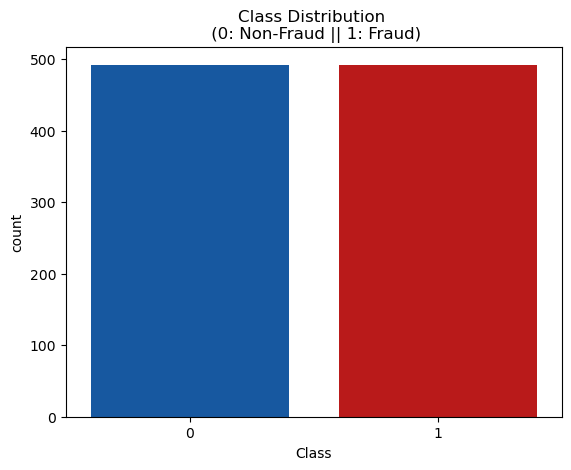

In [15]:
print("Data Distribution in balance dataset")
print(balance_df["Class"].value_counts()/len(balance_df))

sns.countplot(balance_df, x = "Class", palette=["#0057B7", "#D30000"])
plt.title("Class Distribution \n (0: Non-Fraud || 1: Fraud)")

### Correlation Matrix (Imbalance vs Balance Dataset)

Text(0.5, 1.0, 'Balanced Correlation Matrix')

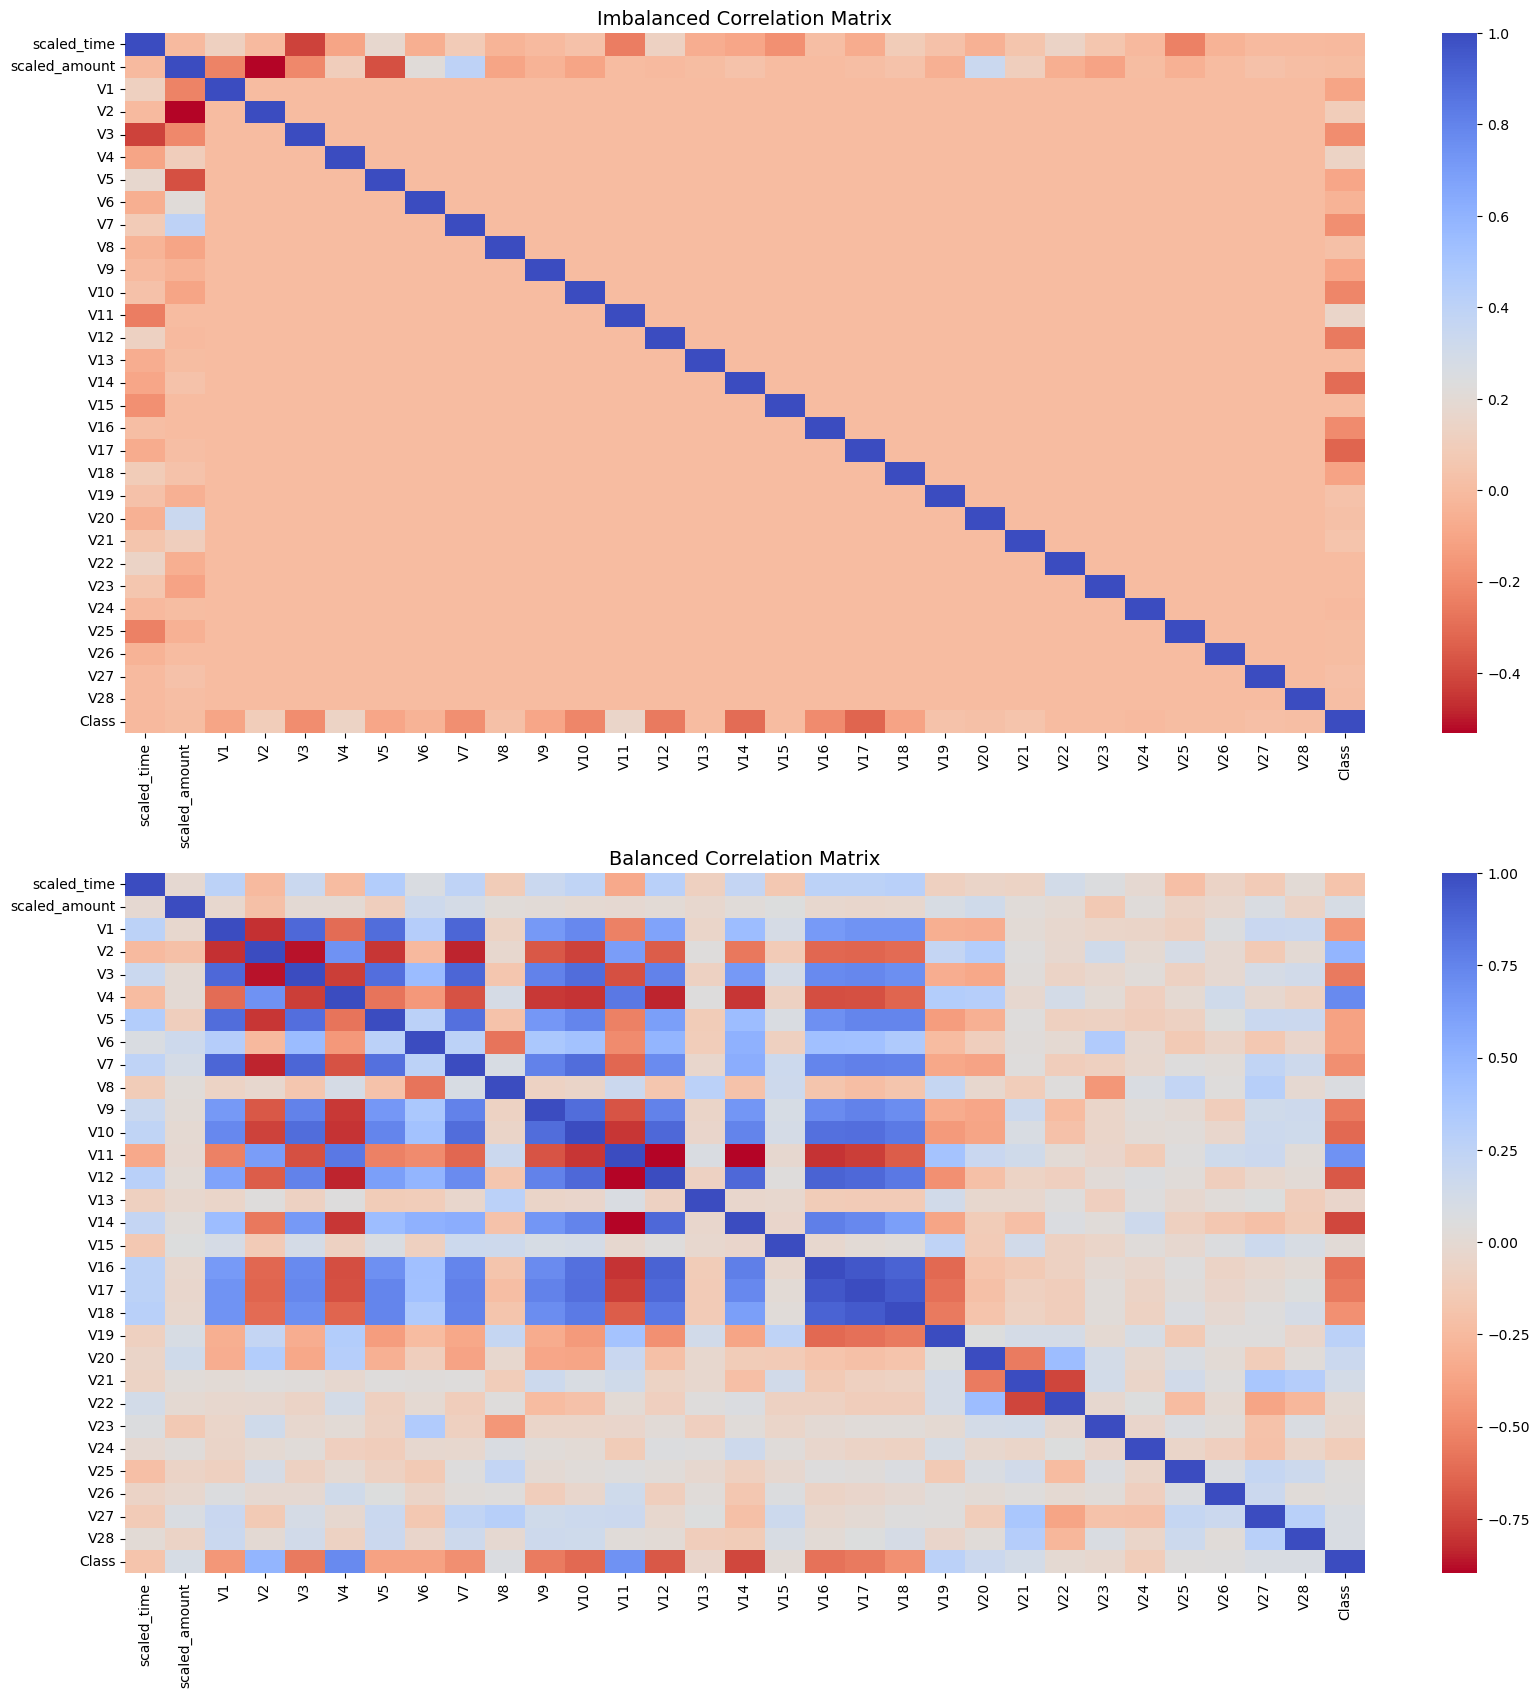

In [16]:
fig, ax = plt.subplots(2, 1, figsize = (20,20))

corr = df.corr()
sns.heatmap(corr, cmap = "coolwarm_r", annot_kws = {"size": 20}, ax = ax[0])
ax[0].set_title("Imbalanced Correlation Matrix", fontsize = 14)

balance_corr = balance_df.corr()
sns.heatmap(balance_corr, cmap = "coolwarm_r", annot_kws = {"size": 20}, ax = ax[1])
ax[1].set_title("Balanced Correlation Matrix", fontsize = 14)

### Box Plot

#### Negative Correlation

C:\Users\khais\AppData\Local\Temp\ipykernel_5872\3551899838.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = balance_df, x = "Class", y = "V14", palette = colors, ax = ax[0])
C:\Users\khais\AppData\Local\Temp\ipykernel_5872\3551899838.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = balance_df, x = "Class", y = "V12", palette = colors, ax = ax[1])
C:\Users\khais\AppData\Local\Temp\ipykernel_5872\3551899838.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = balance_df, x = "Class", y = "V10", palette = colors, ax 

Text(0.5, 1.0, 'V16 vs Class Negative Correlation')

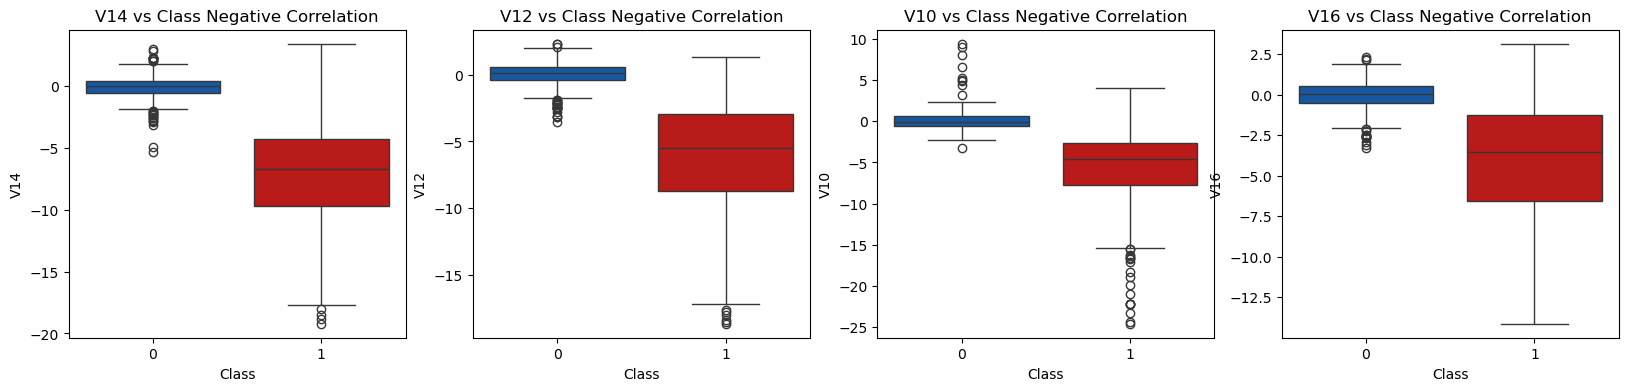

In [17]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))

colors = ["#0057B7", "#D30000"]
sns.boxplot(data = balance_df, x = "Class", y = "V14", palette = colors, ax = ax[0])
ax[0].set_title("V14 vs Class Negative Correlation")

sns.boxplot(data = balance_df, x = "Class", y = "V12", palette = colors, ax = ax[1])
ax[1].set_title("V12 vs Class Negative Correlation")

sns.boxplot(data = balance_df, x = "Class", y = "V10", palette = colors, ax = ax[2])
ax[2].set_title("V10 vs Class Negative Correlation")

sns.boxplot(data = balance_df, x = "Class", y = "V16", palette = colors, ax = ax[3])
ax[3].set_title("V16 vs Class Negative Correlation")

#### Positive Correlation

C:\Users\khais\AppData\Local\Temp\ipykernel_5872\1098575085.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = balance_df, x = "Class", y = "V4", palette = colors, ax = ax[0])
C:\Users\khais\AppData\Local\Temp\ipykernel_5872\1098575085.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = balance_df, x = "Class", y = "V11", palette = colors, ax = ax[1])
C:\Users\khais\AppData\Local\Temp\ipykernel_5872\1098575085.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = balance_df, x = "Class", y = "V2", palette = colors, ax = 

Text(0.5, 1.0, 'V19 vs Class Positive Correlation')

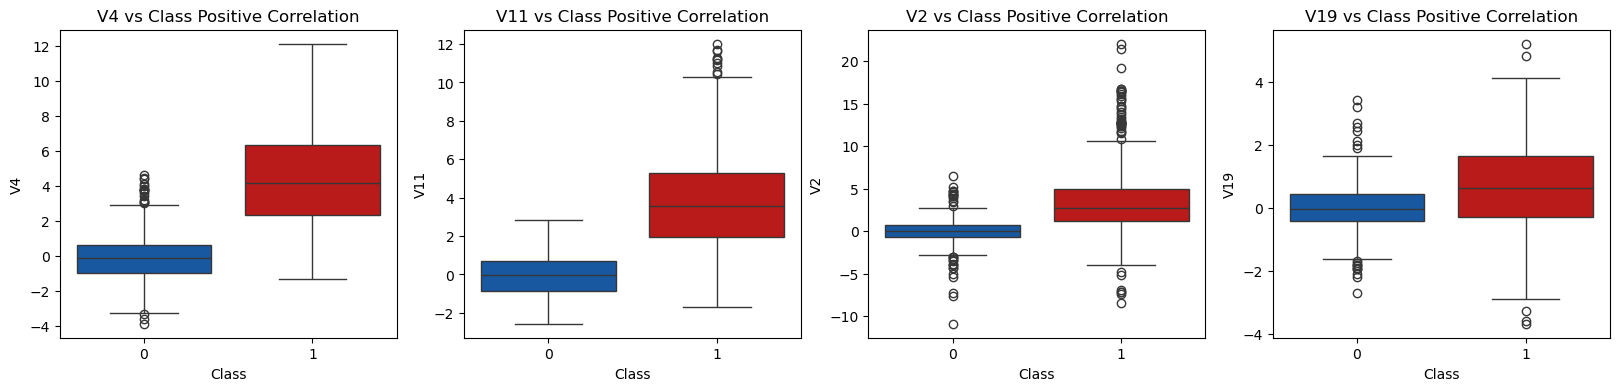

In [18]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))

colors = ["#0057B7", "#D30000"]
sns.boxplot(data = balance_df, x = "Class", y = "V4", palette = colors, ax = ax[0])
ax[0].set_title("V4 vs Class Positive Correlation")

sns.boxplot(data = balance_df, x = "Class", y = "V11", palette = colors, ax = ax[1])
ax[1].set_title("V11 vs Class Positive Correlation")

sns.boxplot(data = balance_df, x = "Class", y = "V2", palette = colors, ax = ax[2])
ax[2].set_title("V2 vs Class Positive Correlation")

sns.boxplot(data = balance_df, x = "Class", y = "V19", palette = colors, ax = ax[3])
ax[3].set_title("V19 vs Class Positive Correlation")

### Histogram

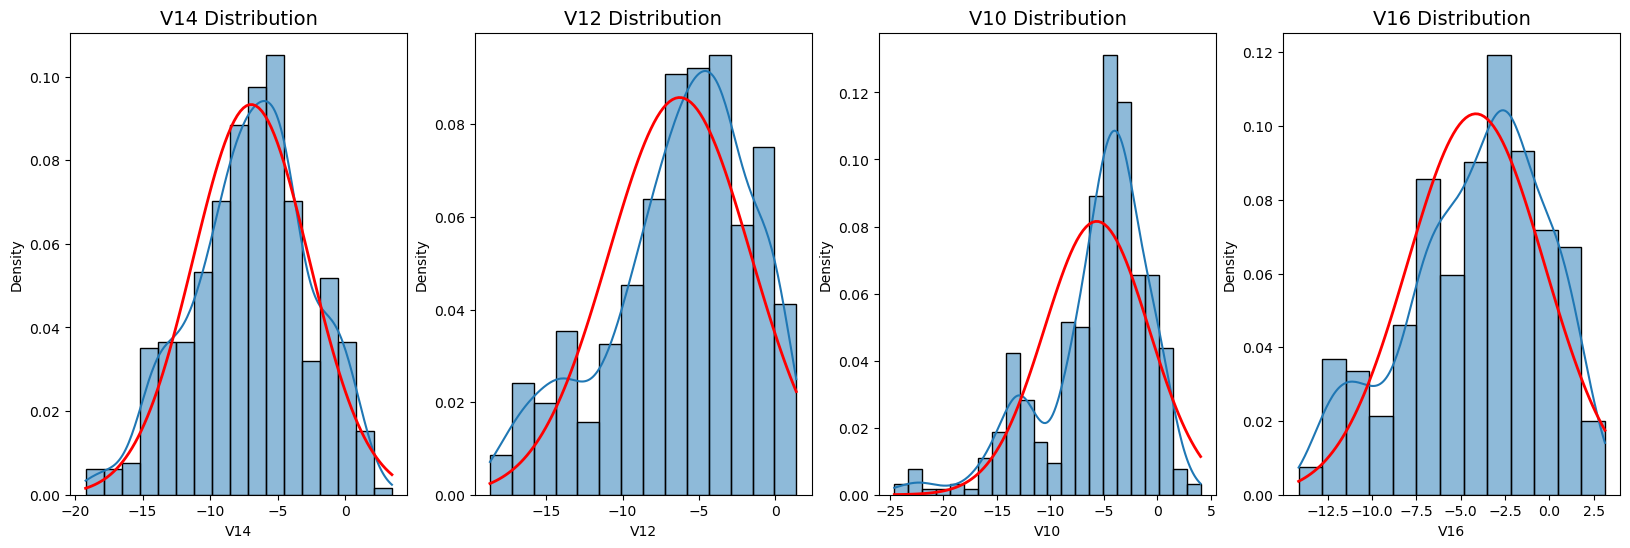

In [19]:
fig, ax = plt.subplots(1, 4, figsize = (20, 6))

features = ["V14", "V12", "V10", "V16"]
for i, feature in enumerate(features):

    fraud = balance_df[feature].loc[balance_df["Class"] == 1]
    sns.histplot(fraud, stat = "density", kde = True, ax = ax[i])
    
    # Fit normal distribution
    mu, std = norm.fit(fraud)
    x = np.linspace(min(fraud), max(fraud), 100)
    p = norm.pdf(x, mu, std)
    ax[i].plot(x, p, "r", linewidth = 2)
    ax[i].set_title(f"{feature} Distribution", fontsize = 14)

# Remove Outliers

In [20]:
# Calculate Lower and upper bound
features = ["V14", "V12", "V10"] # only V16 don't have outliers at Class = 1

for i, feature in enumerate(features):
    fraud = balance_df[feature].loc[balance_df["Class"] == 1]
    q25, q75 = np.percentile(fraud, 25), np.percentile(fraud, 75)
    iqr = q75 - q25
    print(f"Q1: {q25: .2f}, Q3: {q75: .2f}, IQR: {iqr: .2f}")
    
    threshhold = iqr * 1.5
    lower, upper = q25 - threshhold, q75 + threshhold
    print(f"{feature} Lower Bound: {lower: .2f}, {feature} Upper Bound: {upper: .2f}")

    outliers = fraud[(fraud < lower) | (fraud > upper)]
    mask = ((balance_df["Class"] == 1) & (balance_df[feature] >= lower) & (balance_df[feature] <= upper))
    balance_df = balance_df[mask | (balance_df["Class"] == 0)]
    print(f"{feature} Outliers Count: {len(outliers)}")
    print("-" * 100)

Q1: -9.69, Q3: -4.28, IQR:  5.41
V14 Lower Bound: -17.81, V14 Upper Bound:  3.83
V14 Outliers Count: 4
----------------------------------------------------------------------------------------------------
Q1: -8.67, Q3: -2.89, IQR:  5.78
V12 Lower Bound: -17.34, V12 Upper Bound:  5.78
V12 Outliers Count: 4
----------------------------------------------------------------------------------------------------
Q1: -7.47, Q3: -2.51, IQR:  4.95
V10 Lower Bound: -14.90, V10 Upper Bound:  4.92
V10 Outliers Count: 27
----------------------------------------------------------------------------------------------------


### Box Plot after remove outliers

C:\Users\khais\AppData\Local\Temp\ipykernel_5872\2266513514.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = balance_df, x = "Class", y = "V14", palette = colors, ax = ax[0])
C:\Users\khais\AppData\Local\Temp\ipykernel_5872\2266513514.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = balance_df, x = "Class", y = "V12", palette = colors, ax = ax[1])
C:\Users\khais\AppData\Local\Temp\ipykernel_5872\2266513514.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = balance_df, x = "Class", y = "V10", palette = colors, ax 

Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

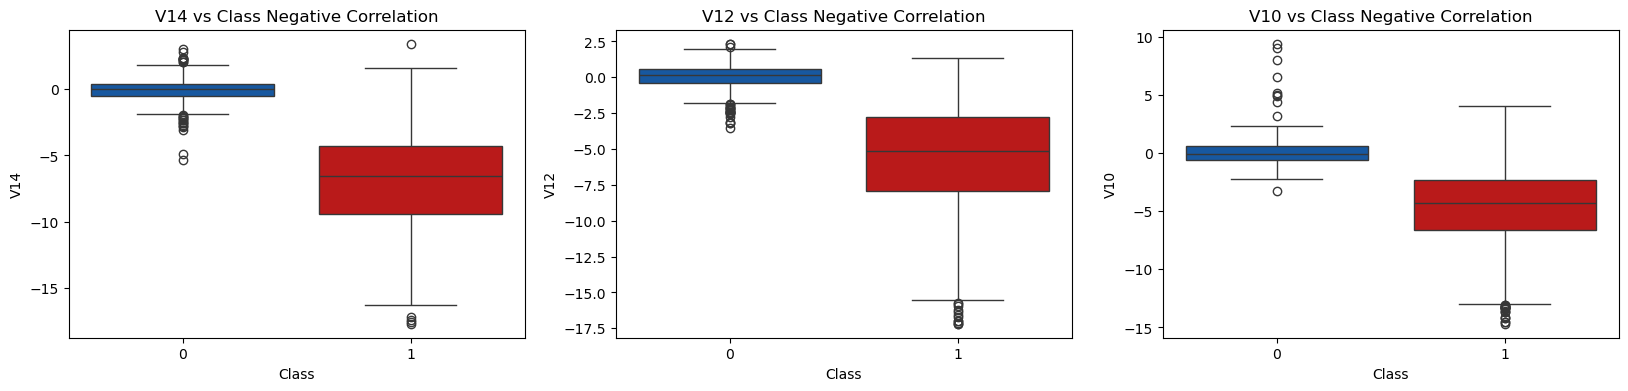

In [21]:
fig, ax = plt.subplots(1, 3, figsize = (20, 4))

colors = ["#0057B7", "#D30000"]
sns.boxplot(data = balance_df, x = "Class", y = "V14", palette = colors, ax = ax[0])
ax[0].set_title("V14 vs Class Negative Correlation")

sns.boxplot(data = balance_df, x = "Class", y = "V12", palette = colors, ax = ax[1])
ax[1].set_title("V12 vs Class Negative Correlation")

sns.boxplot(data = balance_df, x = "Class", y = "V10", palette = colors, ax = ax[2])
ax[2].set_title("V10 vs Class Negative Correlation")

# Modelling (Random Undersampling)

### (WRONG WAY - Data Leakage)

In [22]:
X = balance_df.drop("Class", axis = 1)
y = balance_df["Class"]

balance_X_train, balance_X_test, balance_y_train, balance_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

acc_before_grid = []
acc_after_grid = []

#### Training Accuracy

In [24]:
print("Training Accuracy")
print("_" * 50)
for key, classifier in classifiers.items():
    classifier.fit(balance_X_train, balance_y_train)
    training_scores = cross_val_score(classifier, balance_X_train, balance_y_train, cv = 5)
    acc_before_grid.append(f"{training_scores.mean() * 100: .2f}%")
    print(f"{key}: {training_scores.mean() * 100: .2f}%")

Training Accuracy
__________________________________________________
Logistic Regression:  93.54%
KNearest:  92.36%
Support Vector Classifier:  92.75%
Decision Tree:  88.67%
Random Forest:  93.54%
Gradient Boosting Classifier:  93.80%
AdaBoost:  93.41%


#### Hyperparameter Tuning

In [25]:
parameters = {
    "Logistic Regression": {
        "penalty": ["l1", "l2", "elasticnet"],
        "C": [0.01, 0.1, 1.0, 10, 100]
        # "solver": ["lbfgs", "liblinear", "sag", "saga"]
    },
    "KNearest": {
        "n_neighbors": list(range(2, 6, 1)),
        "weights": ["uniform", "distance"],
        "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
        "p": [1, 2]
    },
    "Support Vector Classifier": {
        "C": [0.01, 0.1, 1.0, 10, 100],
        "kernel": ["linear", "poly", "rbf", "sigmoid"]
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy", "log_loss"],
        "max_depth": list(range(2, 8, 1)),
        "min_samples_leaf": list(range(1, 9, 2))
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "criterion": ["gini", "entropy", "log_loss"],
        # "max_depth": list(range(2, 8, 1)),
        "min_samples_leaf": list(range(1, 7, 2)),
        # "max_features": ["sqrt", "log2"]
    },
    "Gradient Boosting Classifier": {
        "loss": ["log_loss", "exponential"],
        # "learning_rate": [0.01] +  list(np.arange(0.1, 0.3, 0.1)),
        "n_estimators": [50, 100, 200],
        "subsample": list(np.arange(0, 1.1, 0.2)),
        "criterion": ["friedman_mse", "squared_error"],
        # "max_depth": list(range(2, 8, 1)),
        "min_samples_leaf": list(range(1, 7, 2))
    },
    "AdaBoost": {
        "n_estimators": list(range(10, 110, 10)),
        "learning_rate": [0.01] +  list(np.arange(0.1, 0.4, 0.1))
    }
}

In [26]:
leakage_best_model = {}

for key in classifiers.keys():
    model_path = f"leakage_models/{key.replace(" ", "_")}.pkl"

    if os.path.exists(model_path):
        print(f"Load saved model for {key}")
        with open(model_path, "rb") as f:
            leakage_best_model[key] = pickle.load(f)
    else:
        print(f"Running GridSearchCV for {key}")
        grid_classifier = GridSearchCV(classifiers[key], parameters[key], n_jobs = -1, verbose = 1, error_score=np.nan)
        grid_classifier.fit(balance_X_train, balance_y_train)
        leakage_best_model[key] = grid_classifier.best_estimator_

        os.makedirs("leakage_models", exist_ok = True)
        with open(model_path, "wb") as f:
            pickle.dump(leakage_best_model[key], f)
        print(f"Save {key} model to {model_path}")
    print("_" * 100)

Load saved model for Logistic Regression
____________________________________________________________________________________________________
Load saved model for KNearest
____________________________________________________________________________________________________
Load saved model for Support Vector Classifier
____________________________________________________________________________________________________
Load saved model for Decision Tree
____________________________________________________________________________________________________
Load saved model for Random Forest
____________________________________________________________________________________________________
Load saved model for Gradient Boosting Classifier
____________________________________________________________________________________________________
Load saved model for AdaBoost
____________________________________________________________________________________________________


In [27]:
print("Training Accuracy (Overfitting)")
print("_" * 50)
for key, classifier in classifiers.items():
    classifier = leakage_best_model[key]
    training_scores = cross_val_score(classifier, balance_X_train, balance_y_train, cv = 5)
    acc_after_grid.append(f"{training_scores.mean() * 100: .2f}%")
    print(f"{key}: {training_scores.mean() * 100: .2f}%")

Training Accuracy (Overfitting)
__________________________________________________
Logistic Regression:  93.15%
KNearest:  92.75%
Support Vector Classifier:  93.94%
Decision Tree:  90.91%
Random Forest:  93.41%
Gradient Boosting Classifier:  93.67%
AdaBoost:  94.07%


### (CORRECT WAY - undersampling during cross validation)

In [28]:
X = df.drop("Class", axis = 1)
y = df["Class"]
original_X_train, original_X_test, original_y_train, original_y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

In [29]:
skf = StratifiedKFold(n_splits = 5, random_state = None)

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

for train_index, validation_index in skf.split(original_X_train, original_y_train):
    undersample_X_train, undersample_X_validation = original_X_train.iloc[train_index], original_X_train.iloc[validation_index]
    undersample_y_train, undersample_y_validation = original_y_train.iloc[train_index], original_y_train.iloc[validation_index]
    
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), leakage_best_model["Logistic Regression"])
    undersample_model = undersample_pipeline.fit(undersample_X_train, undersample_y_train) # will retrain the model but keep the parameters
    undersample_prediction = undersample_model.predict(undersample_X_validation)
    
    undersample_accuracy.append(undersample_pipeline.score(undersample_X_validation, undersample_y_validation))
    undersample_precision.append(precision_score(undersample_y_validation, undersample_prediction))
    undersample_recall.append(recall_score(undersample_y_validation, undersample_prediction))
    undersample_f1.append(f1_score(undersample_y_validation, undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_y_validation, undersample_prediction))

# Model Evaluation

### Learning Curve

In [30]:
def plot_learning_curve(models, X, y, cv = None, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    
    n_models = len(models)
    n_rows = math.ceil(n_models / 2)
    
    fig, ax = plt.subplots(n_rows, 2, figsize = (20, 15), sharey = True)
    ax = ax.flatten()

    for i, (key, model) in enumerate(models.items()):
        train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
        
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        ax[i].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
        ax[i].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")

        ax[i].plot(train_sizes, train_scores_mean, "o-", color = "#ff9124", label = "Training Score")
        ax[i].plot(train_sizes, test_scores_mean, "o-", color = "#2492ff", label = "Cross-validation Score")

        ax[i].set_title(f"{key} Learning Curve", fontsize=14)
        ax[i].set_xlabel('Training size (m)')
        ax[i].set_ylabel('Score')
        ax[i].grid(True)
        ax[i].legend(loc="best")

    plt.tight_layout()
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\khais\\anaconda3\\envs\\fraud_detection\\Lib\\site-packages\\matplotlib\\pyplot.py'>

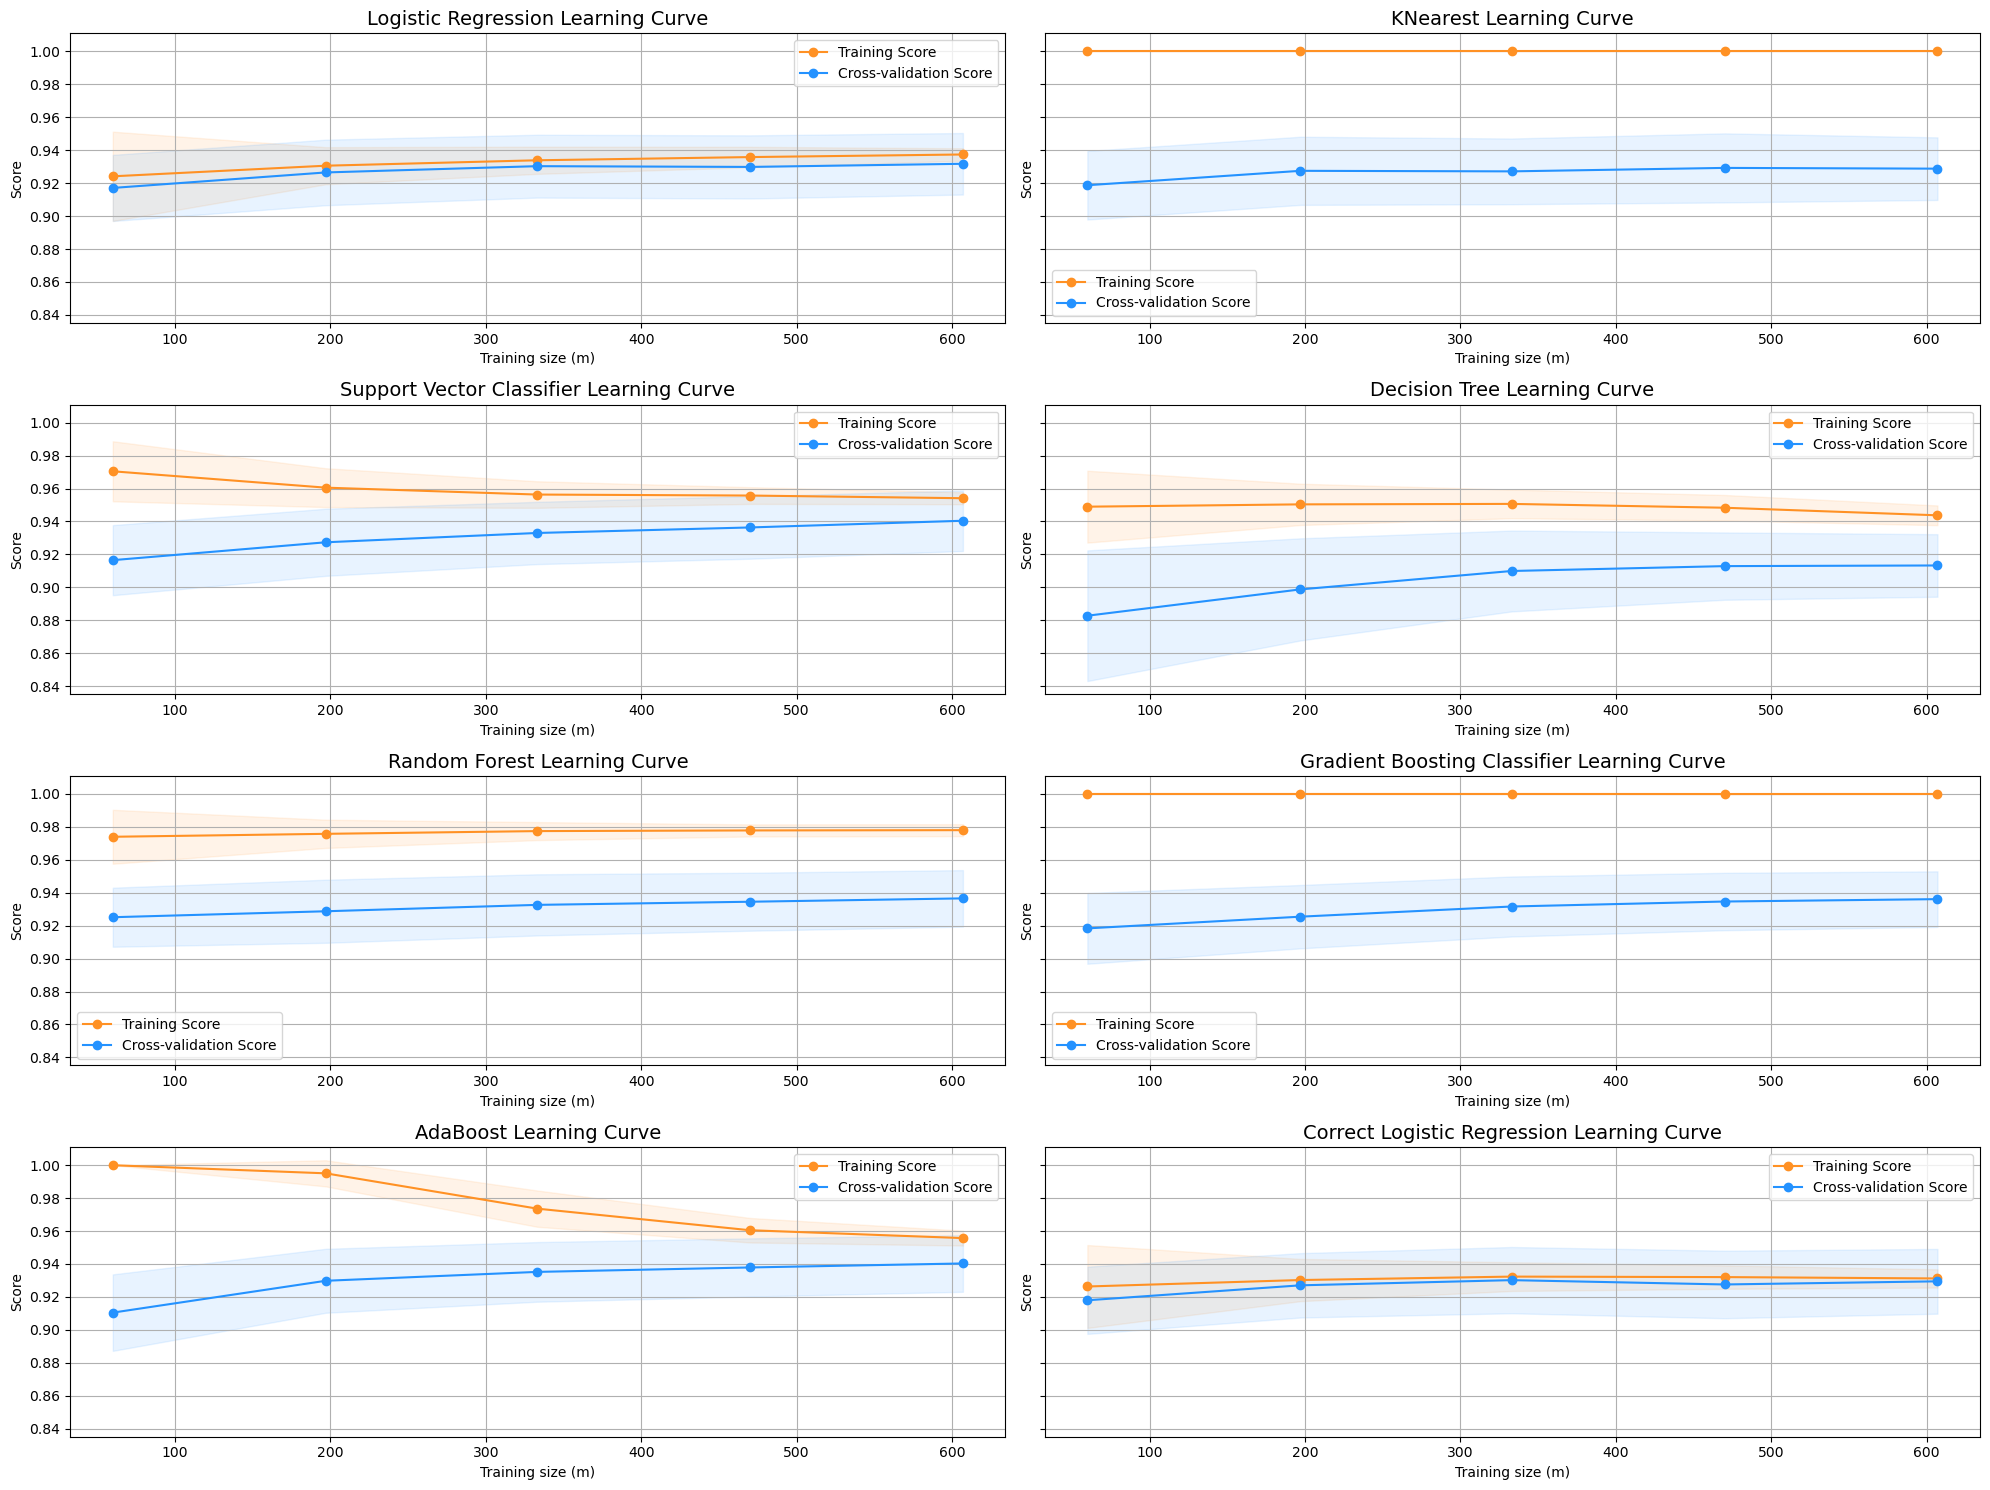

In [31]:
temp_model = leakage_best_model
temp_model["Correct Logistic Regression"] = undersample_model

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(temp_model, balance_X_train, balance_y_train, cv = cv)

### ROC AUC

#### Balance Dataset

In [32]:
def plot_roc_curve(predictions, dataset, y_train):
    rocaucs = {}

    for key, prediction in predictions.items():
        fpr, tpr, threshold = roc_curve(y_train, prediction)
        rocaucs[key] = [fpr, tpr, threshold]
    
    plt.figure(figsize=(16, 8))
    plt.title(f"ROC Curve ({dataset} Dataset)", fontsize = 18)

    for key, rocauc in rocaucs.items():
        plt.plot(rocauc[0], rocauc[1], label = f"{key} Score: {roc_auc_score(y_train, predictions[key]): .4f}")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])

    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50%', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                 arrowprops=dict(facecolor='#6E726D', shrink=0.05))
    plt.legend()

In [33]:
balance_predictions = {}

for key, model in temp_model.items():
    pred = cross_val_predict(model, balance_X_test, balance_y_test, cv = 5)
    balance_predictions[key] = pred

for key, prediction in balance_predictions.items():
    print(f"{key}: {roc_auc_score(balance_y_test, prediction): .4f}")

Logistic Regression:  0.9172
KNearest:  0.9339
Support Vector Classifier:  0.9350
Decision Tree:  0.9144
Random Forest:  0.9072
Gradient Boosting Classifier:  0.9128
AdaBoost:  0.9089
Correct Logistic Regression:  0.9228


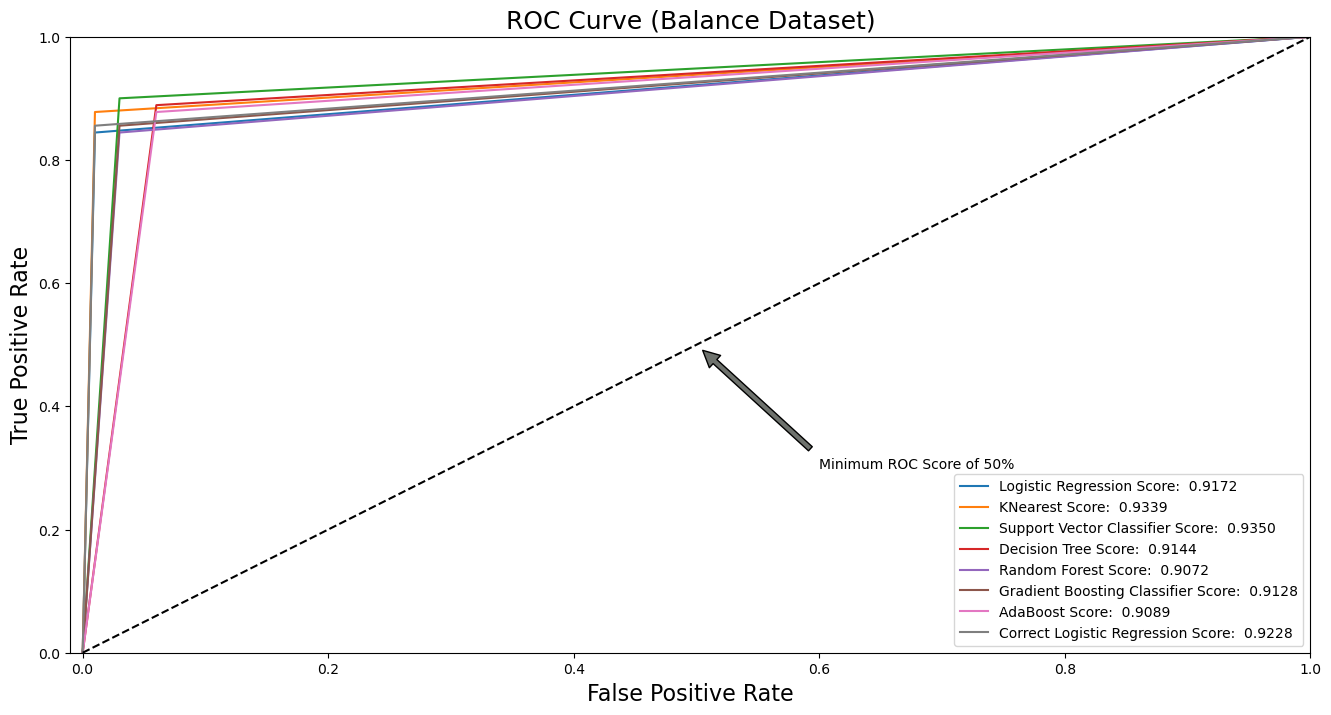

In [34]:
plot_roc_curve(balance_predictions, "Balance", balance_y_test)
plt.show()

#### Original Dataset

In [35]:
# original_predictions = {}

# for key, model in temp_model.items():
#     pred = cross_val_predict(model, original_X_test, original_y_test, cv = 5) # predic test becaause train too large
#     original_predictions[key] = pred

# for key, prediction in original_predictions.items():
#     print(f"{key}: {roc_auc_score(original_y_test, prediction): .4f}")

In [36]:
# plot_roc_curve(original_predictions, "Original", original_y_test)
# plt.show()

### Matrcis Comparison

- Above use balance dataset to train and evaluate model.
- Below use undersampling only in train set (excluding validation set and test set)

In [37]:
y_pred = leakage_best_model["Logistic Regression"].predict(balance_X_train) # model using wrong method

In [38]:
# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Accuracy Score: {:.2f}'.format(accuracy_score(balance_y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(balance_y_train, y_pred)))
print('Recall Score: {:.2f}'.format(recall_score(balance_y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(balance_y_train, y_pred)))

print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Accuracy Score: 0.90
Precision Score: 0.92
Recall Score: 0.87
F1 Score: 0.89
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.95
Precision Score: 0.03
Recall Score: 0.89
F1 Score: 0.06
---------------------------------------------------------------------------------------------------------------------------------------


In [39]:
undersample_y_score = leakage_best_model["Logistic Regression"].decision_function(original_X_test)
undersample_average_precision = average_precision_score(original_y_test, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(undersample_average_precision))

Average precision-recall score: 0.14


# Modelling (SMOTE Oversampling)

In [40]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_X_train), len(original_y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_X_test), len(original_y_test)))

Length of X (train): 227845 | Length of y (train): 227845
Length of X (test): 56962 | Length of y (test): 56962


In [41]:
# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

log_reg = GridSearchCV(LogisticRegression(), parameters["Logistic Regression"], n_jobs = -1, verbose = 1, error_score=np.nan)

for train_index, validation_index in skf.split(original_X_train, original_y_train):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), log_reg)
    model = pipeline.fit(original_X_train.iloc[train_index], original_y_train.iloc[train_index])
    sm_log_reg = log_reg.best_estimator_
    pred = sm_log_reg.predict(original_X_train.iloc[validation_index])

    accuracy_lst.append(pipeline.score(original_X_train.iloc[validation_index], original_y_train.iloc[validation_index]))
    precision_lst.append(precision_score(original_y_train.iloc[validation_index], pred))
    recall_lst.append(recall_score(original_y_train.iloc[validation_index], pred))
    f1_lst.append(f1_score(original_y_train.iloc[validation_index], pred))
    auc_lst.append(roc_auc_score(original_y_train.iloc[validation_index], pred))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Li

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Li

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Li

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Li

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\khais\anaconda3\envs\fraud_detection\Li

In [42]:
print('---' * 45)
print('')
print(f"accuracy: {np.mean(accuracy_lst)}")
print(f"precision: {np.mean(precision_lst)}")
print(f"recall: {np.mean(recall_lst)}")
print(f"f1: {np.mean(f1_lst)}")
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9791261603282934
precision: 0.07125274533605318
recall: 0.9188250567997404
f1: 0.13223681251482813
---------------------------------------------------------------------------------------------------------------------------------------


In [43]:
labels = ['No Fraud', 'Fraud']
smote_prediction = sm_log_reg.predict(original_X_test)
print(classification_report(original_y_test, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     56864
       Fraud       0.06      0.84      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [44]:
y_score = sm_log_reg.decision_function(original_X_test)
average_precision = average_precision_score(original_y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.63


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.63')

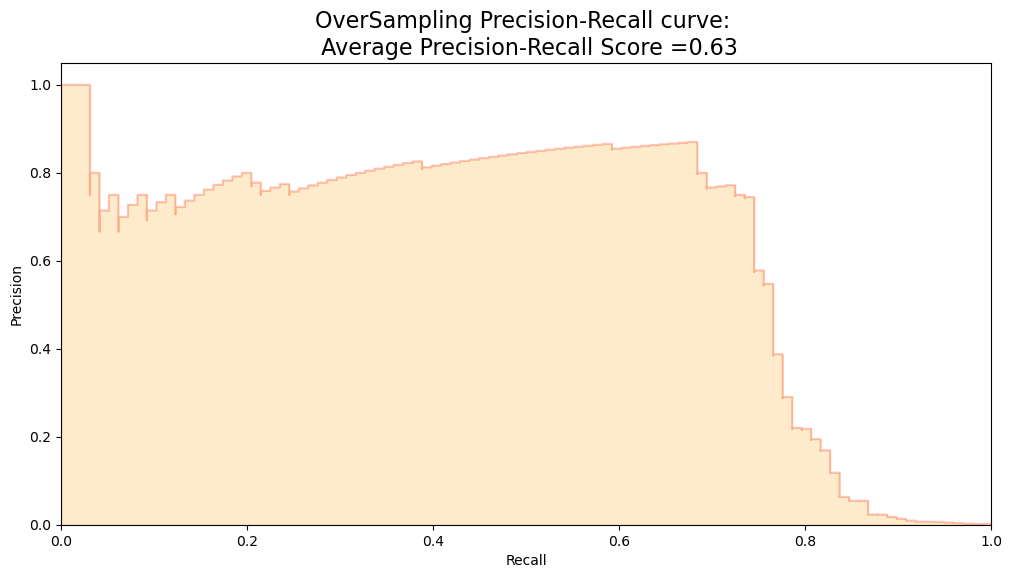

In [45]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_y_test, y_score)

plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f"OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={average_precision:0.2f}", fontsize=16)

# Confusion Matrix

### Balanced Dataset

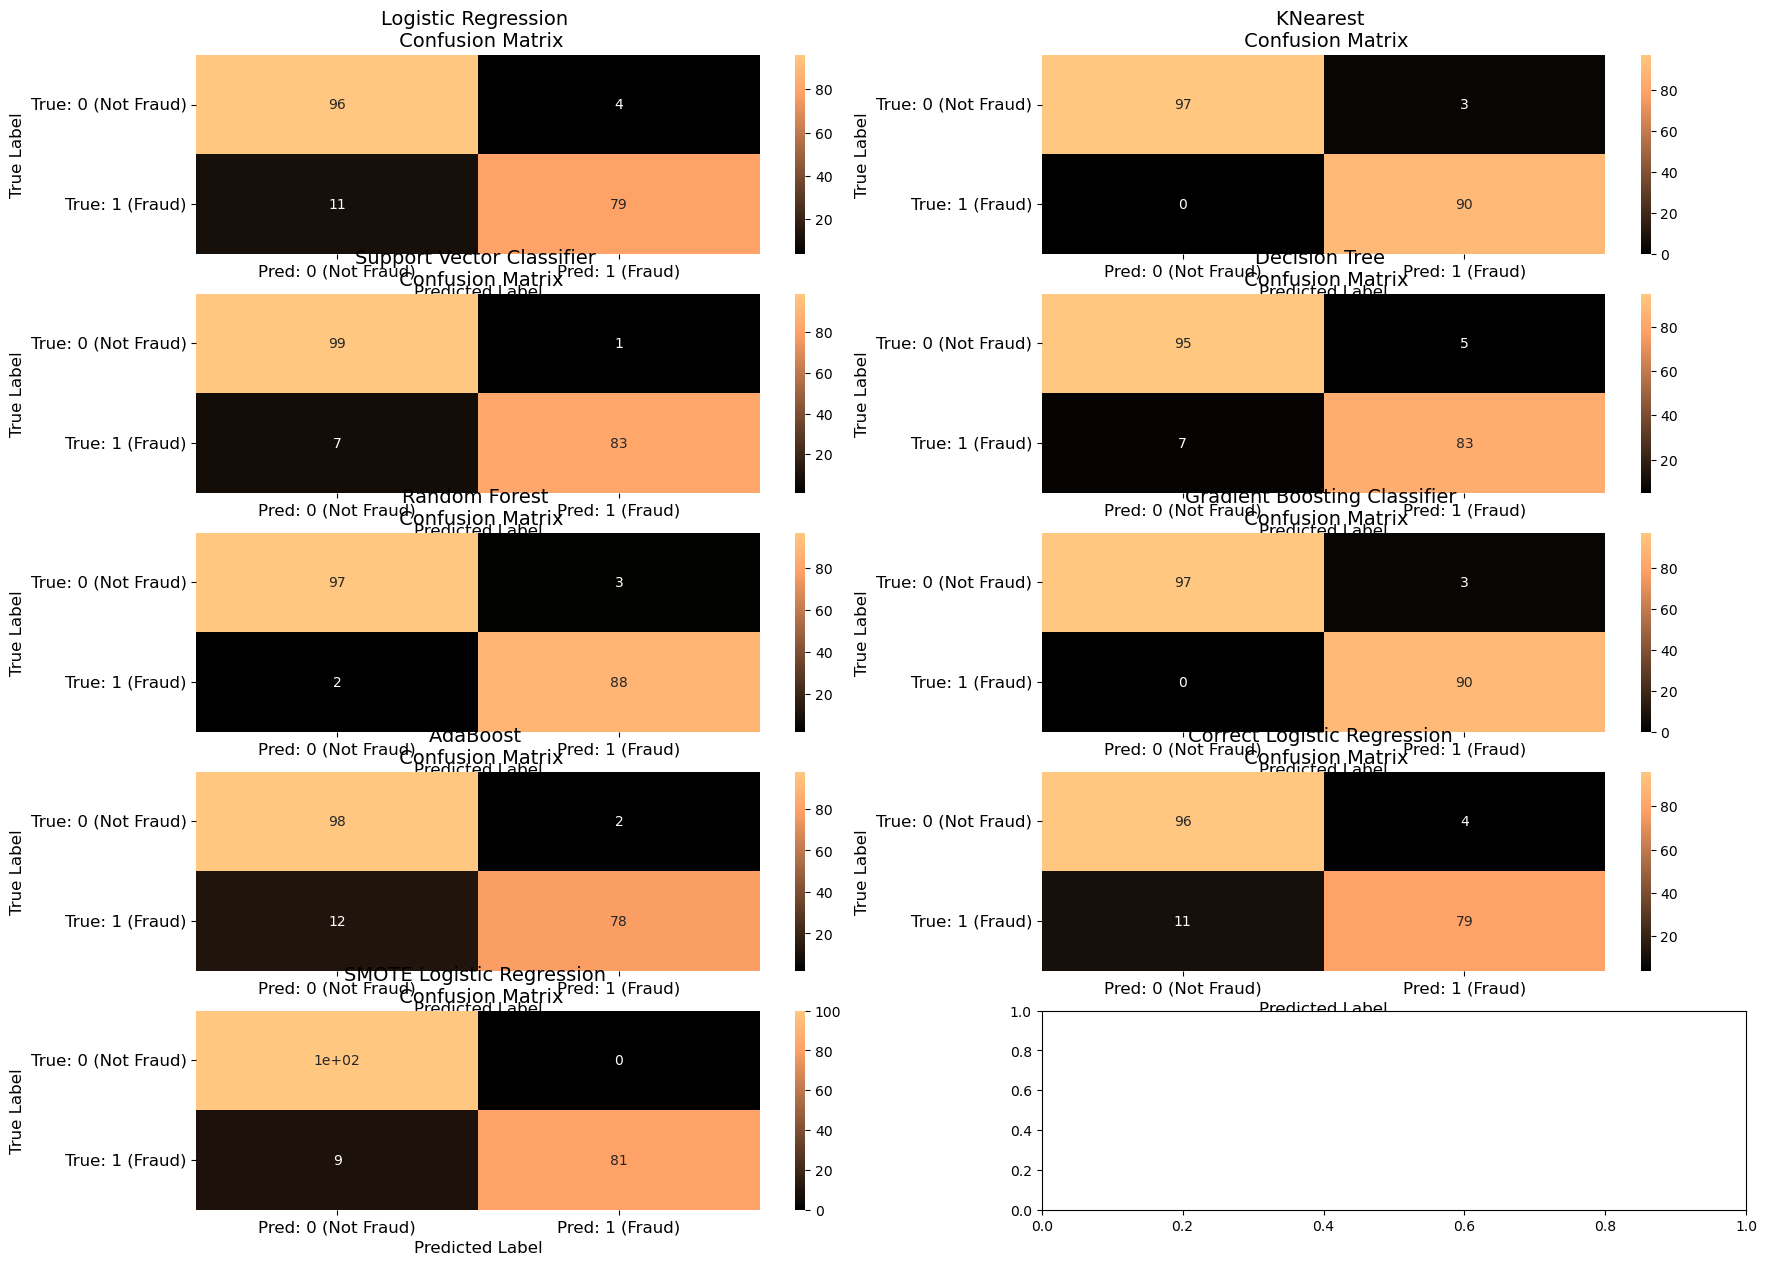

In [46]:
predictions = {}

for key, model in leakage_best_model.items():
    predictions[key] = model.predict(balance_X_test)
predictions["SMOTE Logistic Regression"] = sm_log_reg.predict(balance_X_test)

cfs = {}
for key, prediction in predictions.items():
    cfs[key] = confusion_matrix(balance_y_test, prediction)

n_models = len(cfs)
n_rows = math.ceil(n_models / 2)
fig, ax = plt.subplots(n_rows, 2,figsize=(20,15))
ax = ax.flatten()

for i, (key, cf) in enumerate(cfs.items()):
    sns.heatmap(cf, ax=ax[i], annot=True, cmap=plt.cm.copper)
    
    ax[i].set_title(f"{key} \n Confusion Matrix", fontsize=14)

    ax[i].set_xticklabels(['Pred: 0 (Not Fraud)', 'Pred: 1 (Fraud)'], fontsize=12, rotation=0)
    ax[i].set_yticklabels(['True: 0 (Not Fraud)', 'True: 1 (Fraud)'], fontsize=12, rotation=0)

    ax[i].set_xlabel("Predicted Label", fontsize=12)
    ax[i].set_ylabel("True Label", fontsize=12)

plt.tight_layout
plt.show()

### Original Dataset

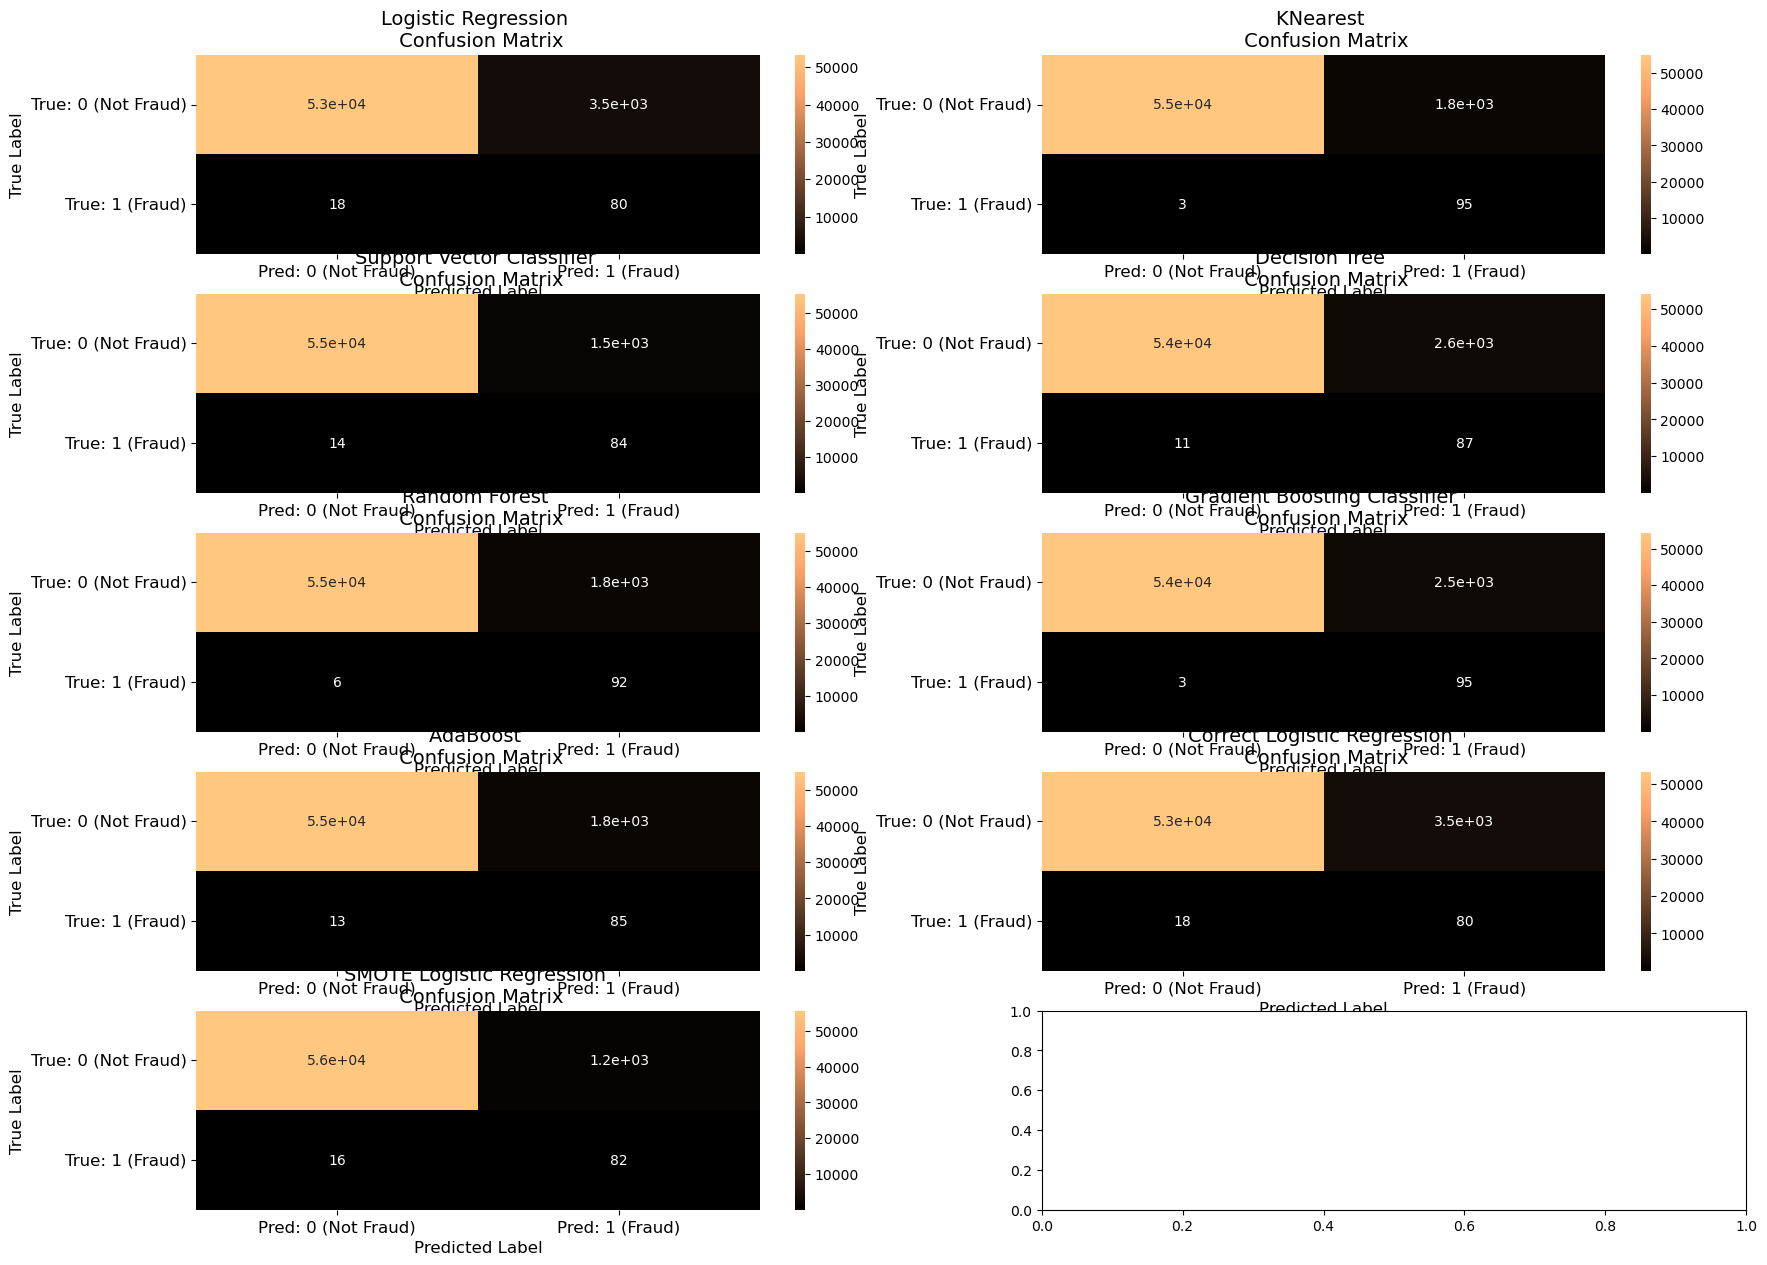

In [47]:
predictions = {}

for key, model in leakage_best_model.items():
    predictions[key] = model.predict(original_X_test)
predictions["SMOTE Logistic Regression"] = sm_log_reg.predict(original_X_test)

cfs = {}
for key, prediction in predictions.items():
    cfs[key] = confusion_matrix(original_y_test, prediction)

n_models = len(cfs)
n_rows = math.ceil(n_models / 2)
fig, ax = plt.subplots(n_rows, 2,figsize=(20,15))
ax = ax.flatten()

for i, (key, cf) in enumerate(cfs.items()):
    sns.heatmap(cf, ax=ax[i], annot=True, cmap=plt.cm.copper)
    
    ax[i].set_title(f"{key} \n Confusion Matrix", fontsize=14)
    
    ax[i].set_xticklabels(['Pred: 0 (Not Fraud)', 'Pred: 1 (Fraud)'], fontsize=12, rotation=0)
    ax[i].set_yticklabels(['True: 0 (Not Fraud)', 'True: 1 (Fraud)'], fontsize=12, rotation=0)

    ax[i].set_xlabel("Predicted Label", fontsize=12)
    ax[i].set_ylabel("True Label", fontsize=12)

plt.tight_layout
plt.show()

In [48]:
y_pred = leakage_best_model["Logistic Regression"].predict(original_X_test)
undersample_score = accuracy_score(original_y_test, y_pred)

sm_y_pred = sm_log_reg.predict(original_X_test)
oversample_score = accuracy_score(original_y_test, sm_y_pred)

d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Technique,Score
0,Random UnderSampling,0.937695
1,Oversampling (SMOTE),0.979004


# Neural Network

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [50]:
class UndersampleNet(nn.Module):
    def __init__(self, n_inputs):
        super(UndersampleNet, self).__init__()
        self.fc1 = nn.Linear(n_inputs, n_inputs)
        self.fc2 = nn.Linear(n_inputs, 32)
        self.fc3 = nn.Linear(32, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [51]:
n_inputs = original_X_train.shape[1]
model = UndersampleNet(n_inputs)

model.to(device)

print(model)

UndersampleNet(
  (fc1): Linear(in_features=30, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=2, bias=True)
)


In [52]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [53]:
X = df.drop("Class", axis = 1)
y = df["Class"]
original_X_train, original_X_test, original_y_train, original_y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

In [54]:
batch_size = 50
epochs = 20

balance_X = balance_df.drop("Class", axis = 1)
balance_y = balance_df["Class"]

balance_X_train, balance_X_validation, balance_y_train, balance_y_validation = train_test_split(balance_X, balance_y, test_size=0.2, random_state=42)

for epoch in range(epochs):
    
    model.train()
    permutation = torch.randperm(len(balance_X_train))

    for i in range(0, balance_X_train.size, batch_size):
        indices = permutation[i : i + batch_size]
        batch_X, batch_y = balance_X_train.iloc[indices], balance_y_train.iloc[indices]

        batch_X_tensor = torch.tensor(batch_X.values, dtype=torch.float32).to(device)
        batch_y_tensor = torch.tensor(batch_y.values, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(batch_X_tensor)
        loss = criterion(outputs, batch_y_tensor)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():

        val_X_tensor = torch.tensor(balance_X_validation.values, dtype=torch.float32).to(device)
        val_y_tensor = torch.tensor(balance_y_validation.values, dtype=torch.long).to(device)

        val_outputs = model(val_X_tensor)
        val_loss = criterion(val_outputs, val_y_tensor)
        val_preds = torch.argmax(val_outputs, dim=1)
        accuracy = (val_preds == val_y_tensor).float().mean()
        print(f"Epoch {epoch+1}/{epochs} - Val Loss: {val_loss.item():.4f} - Val Accuracy: {accuracy.item():.4f}")

Epoch 1/20 - Val Loss: 0.4294 - Val Accuracy: 0.8579
Epoch 2/20 - Val Loss: 0.2553 - Val Accuracy: 0.9000
Epoch 3/20 - Val Loss: 0.1491 - Val Accuracy: 0.9526
Epoch 4/20 - Val Loss: 0.2059 - Val Accuracy: 0.9263
Epoch 5/20 - Val Loss: 0.1417 - Val Accuracy: 0.9579
Epoch 6/20 - Val Loss: 0.1541 - Val Accuracy: 0.9421
Epoch 7/20 - Val Loss: 0.1561 - Val Accuracy: 0.9474
Epoch 8/20 - Val Loss: 0.1318 - Val Accuracy: 0.9684
Epoch 9/20 - Val Loss: 0.2167 - Val Accuracy: 0.9368
Epoch 10/20 - Val Loss: 0.2271 - Val Accuracy: 0.9368
Epoch 11/20 - Val Loss: 0.2140 - Val Accuracy: 0.9421
Epoch 12/20 - Val Loss: 0.2744 - Val Accuracy: 0.9053
Epoch 13/20 - Val Loss: 0.2415 - Val Accuracy: 0.9474
Epoch 14/20 - Val Loss: 0.3081 - Val Accuracy: 0.9263
Epoch 15/20 - Val Loss: 0.2694 - Val Accuracy: 0.9526
Epoch 16/20 - Val Loss: 0.4302 - Val Accuracy: 0.9316
Epoch 17/20 - Val Loss: 0.3507 - Val Accuracy: 0.9421
Epoch 18/20 - Val Loss: 0.3852 - Val Accuracy: 0.9105
Epoch 19/20 - Val Loss: 0.4767 - Val 

In [55]:
import itertools

def plot_confusion_matrix(cm, classes, ax, normalise = False, title = "Confusion Matrix", cmap=plt.cm.Blues):
    if normalise:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title, fontsize=14)
    plt.colorbar(im, ax = ax)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    fmt = '.2f' if normalise else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 ha="center",
                 color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

Confusion matrix, without normalization
Confusion matrix, without normalization


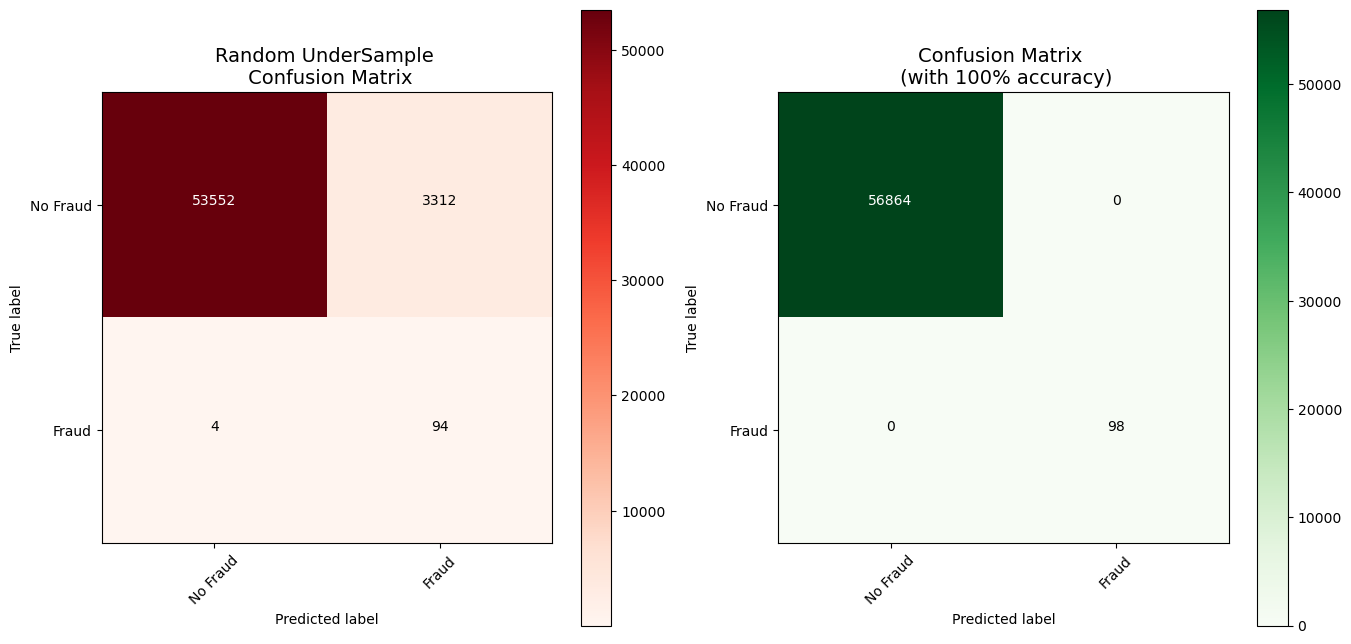

In [56]:
test_X_tensor = torch.tensor(original_X_test.values, dtype=torch.float32).to(device)
model.eval()
with torch.no_grad():
    test_outputs = model(test_X_tensor)
    test_preds = torch.argmax(test_outputs, dim=1)
test_preds_np = test_preds.cpu().numpy()


undersample_cm = confusion_matrix(original_y_test, test_preds_np)
actual_cm = confusion_matrix(original_y_test, original_y_test)
labels = ['No Fraud', 'Fraud']

fig, ax = plt.subplots(1, 2, figsize=(16,8))

plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds, ax = ax[0])
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens, ax = ax[1])

In [57]:
class OversampleNet(nn.Module):
    def __init__(self, n_inputs):
        super(OversampleNet, self).__init__()
        self.fc1 = nn.Linear(n_inputs, n_inputs)
        self.fc2 = nn.Linear(n_inputs, 32)
        self.fc3 = nn.Linear(32, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x

In [58]:
n_inputs = original_X_train.shape[1]
model = OversampleNet(n_inputs)

model.to(device)

print(model)

OversampleNet(
  (fc1): Linear(in_features=30, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=2, bias=True)
)


In [59]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [60]:
batch_size = 1000
epochs = 20


X_train, X_validation, y_train, y_validation = train_test_split(original_X_train, original_y_train, test_size = 0.2,
                                                                stratify=original_y_train, random_state = 42)
smote = SMOTE(sampling_strategy='minority')
oversample_X_train, oversample_y_train = smote.fit_resample(X_train, y_train)

for epoch in range(epochs):
    
    model.train()
    permutation = torch.randperm(len(oversample_X_train))

    for i in range(0, oversample_X_train.size, batch_size):
        indices = permutation[i : i + batch_size]
        batch_X, batch_y = oversample_X_train.iloc[indices], oversample_y_train.iloc[indices]

        batch_X_tensor = torch.tensor(batch_X.values, dtype=torch.float32).to(device)
        batch_y_tensor = torch.tensor(batch_y.values, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(batch_X_tensor)
        loss = criterion(outputs, batch_y_tensor)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():

        val_X_tensor = torch.tensor(X_validation.values, dtype=torch.float32).to(device)
        val_y_tensor = torch.tensor(y_validation.values, dtype=torch.long).to(device)

        val_outputs = model(val_X_tensor)
        val_loss = criterion(val_outputs, val_y_tensor)
        val_preds = torch.argmax(val_outputs, dim=1)
        accuracy = (val_preds == val_y_tensor).float().mean()
        print(f"Epoch {epoch+1}/{epochs} - Val Loss: {val_loss.item():.4f} - Val Accuracy: {accuracy.item():.4f}")

Epoch 1/20 - Val Loss: 0.3269 - Val Accuracy: 0.9889
Epoch 2/20 - Val Loss: 0.3169 - Val Accuracy: 0.9963
Epoch 3/20 - Val Loss: 0.3149 - Val Accuracy: 0.9983
Epoch 4/20 - Val Loss: 0.3148 - Val Accuracy: 0.9986
Epoch 5/20 - Val Loss: 0.3145 - Val Accuracy: 0.9987
Epoch 6/20 - Val Loss: 0.3153 - Val Accuracy: 0.9979
Epoch 7/20 - Val Loss: 0.3146 - Val Accuracy: 0.9986
Epoch 8/20 - Val Loss: 0.3144 - Val Accuracy: 0.9989
Epoch 9/20 - Val Loss: 0.3145 - Val Accuracy: 0.9987
Epoch 10/20 - Val Loss: 0.3144 - Val Accuracy: 0.9989
Epoch 11/20 - Val Loss: 0.3145 - Val Accuracy: 0.9987
Epoch 12/20 - Val Loss: 0.3140 - Val Accuracy: 0.9993
Epoch 13/20 - Val Loss: 0.3143 - Val Accuracy: 0.9990
Epoch 14/20 - Val Loss: 0.3145 - Val Accuracy: 0.9987
Epoch 15/20 - Val Loss: 0.3147 - Val Accuracy: 0.9986
Epoch 16/20 - Val Loss: 0.3140 - Val Accuracy: 0.9992
Epoch 17/20 - Val Loss: 0.3146 - Val Accuracy: 0.9986
Epoch 18/20 - Val Loss: 0.3145 - Val Accuracy: 0.9987
Epoch 19/20 - Val Loss: 0.3142 - Val 

Confusion matrix, without normalization
Confusion matrix, without normalization


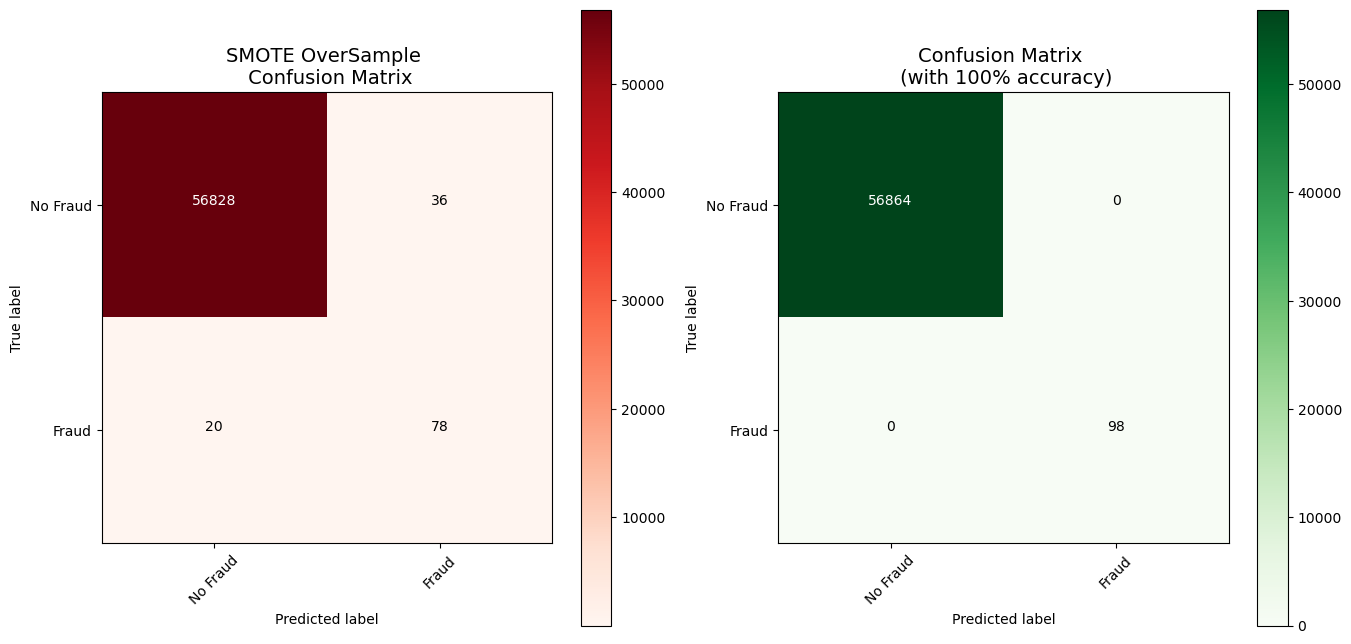

In [61]:
test_X_tensor = torch.tensor(original_X_test.values, dtype=torch.float32).to(device)
model.eval()
with torch.no_grad():
    test_outputs = model(test_X_tensor)
    test_preds = torch.argmax(test_outputs, dim=1)
test_preds_np = test_preds.cpu().numpy()


oversample_cm = confusion_matrix(original_y_test, test_preds_np)
actual_cm = confusion_matrix(original_y_test, original_y_test)
labels = ['No Fraud', 'Fraud']

fig, ax = plt.subplots(1, 2, figsize=(16,8))

plot_confusion_matrix(oversample_cm, labels, title="SMOTE OverSample \n Confusion Matrix", cmap=plt.cm.Reds, ax = ax[0])
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens, ax = ax[1])